In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('C:/Users/chubb/Downloads/coursework_other.csv', encoding= 'unicode_escape')

# label data into catergories
# e.g. [winter, summer, spring, spring] -> [0, 1, 2, 2]
le = LabelEncoder()
df['Date'] = le.fit_transform(df['Date'])
df['Seasons'] = le.fit_transform(df['Seasons'])
df['Holiday'] = le.fit_transform(df['Holiday'])
df['Functioning Day'] = le.fit_transform(df['Functioning Day'])

In [39]:
Y = np.array(df['Rented Bike Count'])
X = np.array(df.loc[:, df.columns != 'Rented Bike Count'])

# split train test dataset
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=10)

Dummy Regressor

In [41]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(Xtr,Ytr)
Ypred = dummy_regr.predict(Xtest)
dummy_mse = mean_squared_error(Ytest, Ypred)
print(f'MSE: {dummy_mse:.2f}')

MSE: 407233.58


K-Nearest Neighbour Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KFold with 5 splits. 
# Set the parameter random_state to help you reproduce your results if needed.
cv = KFold(n_splits=5,random_state=10, shuffle=True)

# Set a variable max_k to 30 
max_k = 30

# Inititalise two variables to store the 
# training accuracies and validation accuracies 
# (these need to store max_k*5 accuracies) 
train_mse = [[] for _ in range(max_k)]
val_mse = [[] for _ in range(max_k)]

# Loop over the values of k: 
for k in range(max_k):
    
    # Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k 
    knn = KNeighborsRegressor(n_neighbors=k+1)
    # Loop over the cross-validation splits: 
    for train_index, val_index in cv.split(Xtr):
        Xtrain, Xval, Ytrain, Yval = Xtr[train_index],\
            Xtr[val_index], Ytr[train_index], Ytr[val_index]
        # fit the model on the current split of data 
        model=knn.fit(Xtrain, Ytrain)
        # make predictions 
        Ypredtrain=model.predict(Xtrain)
        Ypredval=model.predict(Xval)
        # calculate training and validation accuracy and store 
        train_mse[k].append(mean_squared_error(Ytrain,Ypredtrain))
        val_mse[k].append(mean_squared_error(Yval, Ypredval))

# Calculate the mean training and validation accuracies across splits for each k
mean_train_mse = np.mean(train_mse, axis=1)
mean_val_mse = np.mean(val_mse, axis=1)

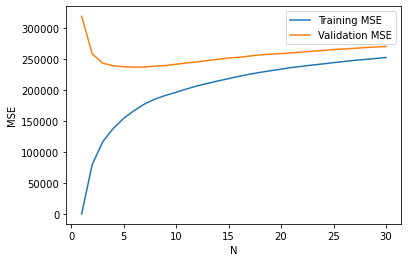

Optimal_N: 6
KNN_MSE: 231055.14


In [35]:
# plot N vs MSE
x = range(1, max_k+1)
plt.plot(x, mean_train_mse, label='Training MSE')
plt.plot(x, mean_val_mse, label='Validation MSE')
plt.legend()
plt.xlabel('N')
plt.ylabel('MSE')
plt.show()

# find optimal N for validation dataset
opt_n = np.argmin(mean_val_mse)+1
knn = KNeighborsRegressor(n_neighbors=opt_n)
print(f'Optimal_N: {opt_n}')

# find MSE of test dataset
knn.fit(Xtr, Ytr)
Ypred = knn.predict(Xtest)
knn_mse = mean_squared_error(Ytest, Ypred)
print(f'KNN_MSE: {knn_mse:.2f}')

In [30]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

model=linear.fit(Xtr, Ytr)

Ypred = np.array(model.predict(Xtest),dtype='int64')

r2 = r2_score(Ytest,Ypred)
mse = mean_squared_error(Ytest,Ypred)

print(f'R square: {r2:.2f}')
print(f'MSE: {mse:.2f}')

R square: 0.56
MSE: 178978.89


In [34]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(Xtr,Ytr)
Ypred = dummy_regr.predict(Xtest)
dummy_mse = mean_squared_error(Ytest, Ypred)
print(f'MSE: {dummy_mse:.2f}')

MSE: 407233.58


In [51]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate KFold with 5 splits. 
# Set the parameter random_state to help you reproduce your results if needed.
cv = KFold(n_splits=5,random_state=10, shuffle=True)

# Set a variable max_k to 30 
max_d = 30

# Inititalise two variables to store the 
# training accuracies and validation accuracies 
# (these need to store max_k*5 accuracies) 
train_mse = [[] for _ in range(max_d)]
val_mse = [[] for _ in range(max_d)]

# Loop over the values of k: 
for d in range(max_d):
    
    # Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k 
    dtr = DecisionTreeRegressor(max_depth=d+1)
    # Loop over the cross-validation splits: 
    for train_index, val_index in cv.split(Xtr):
        Xtrain, Xval, Ytrain, Yval = Xtr[train_index],\
            Xtr[val_index], Ytr[train_index], Ytr[val_index]
        # fit the model on the current split of data 
        model=dtr.fit(Xtrain, Ytrain)
        # make predictions 
        Ypredtrain=model.predict(Xtrain)
        Ypredval=model.predict(Xval)
        # calculate training and validation accuracy and store 
        train_mse[d].append(mean_squared_error(Ytrain,Ypredtrain))
        val_mse[d].append(mean_squared_error(Yval, Ypredval))

# Calculate the mean training and validation accuracies across splits for each k
mean_train_mse = np.mean(train_mse, axis=1)
mean_val_mse = np.mean(val_mse, axis=1)

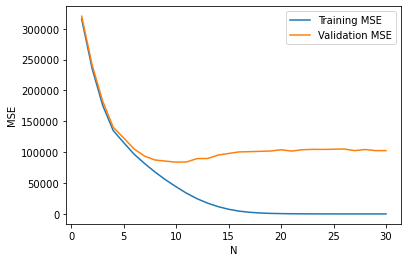

Optimal_Depth: 10
DecisionTreeRegressor_MSE: 80917.77


In [52]:
# plot N vs MSE
x = range(1, max_k+1)
plt.plot(x, mean_train_mse, label='Training MSE')
plt.plot(x, mean_val_mse, label='Validation MSE')
plt.legend()
plt.xlabel('N')
plt.ylabel('MSE')
plt.show()

# find optimal N for validation dataset
opt_d = np.argmin(mean_val_mse)+1
print(f'Optimal_Depth: {opt_d}')

# find MSE of test dataset
dtr = DecisionTreeRegressor(max_depth=opt_d)
dtr.fit(Xtr, Ytr)
Ypred = dtr.predict(Xtest)
dtr_mse = mean_squared_error(Ytest, Ypred)
print(f'DecisionTreeRegressor_MSE: {dtr_mse:.2f}')

In [14]:
from sklearn.ensemble import RandomForestRegressor
max_d = 10
mse_hist = []
for d in range(1,max_d):
    regr = RandomForestRegressor(max_depth=d, random_state=0)
    regr.fit(Xtr,Ytr)
    ypred = regr.predict(Xtest)
    mse = mean_squared_error(Ytest, ypred)
    mse_hist.append(mse)

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
params = {
    "n_neighbors" : [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    "weights" : ['uniform', 'distance'],
    "algorithm" : ['ball_tree','kd_tree','brute']
}
search = GridSearchCV(knn, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
result = search.fit(Xtr, Ytr)
print(result.best_estimator_)